<a href="https://colab.research.google.com/github/stories-of-life/COVID19-india/blob/master/covid19_india_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PLOT-3: a. REAL-TIME LOCATION OF CORONAVIRUS TRANSMISSION IN INDIA


## Confirmed

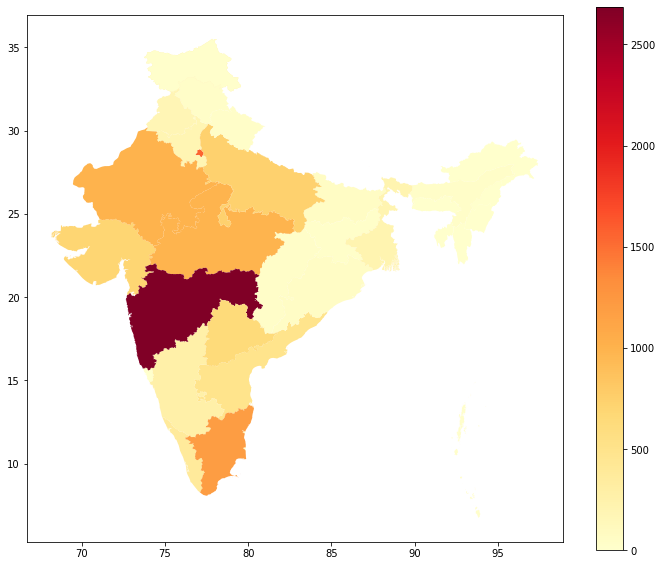

In [0]:
merged_map_data.plot(column='Confirmed',categorical=False,figsize=(12,10),cmap='YlOrRd',legend=True)

## Cured

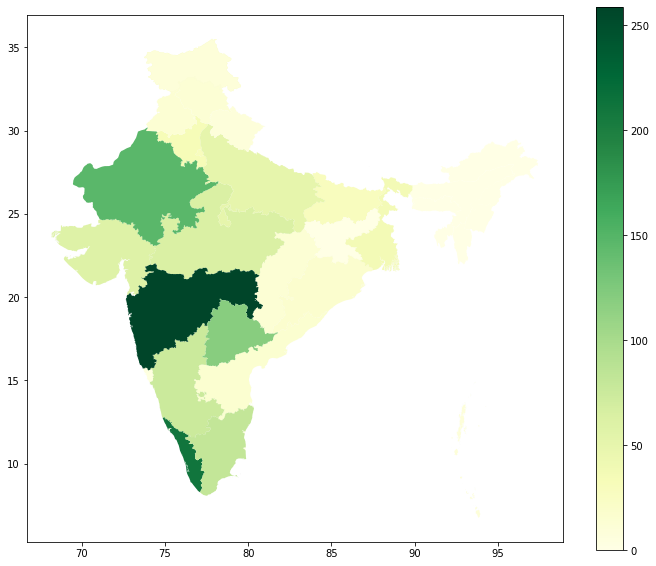

In [0]:
merged_map_data.plot(column='Cured',categorical=False,figsize=(12,10),cmap='YlGn',legend=True)

## Recovered

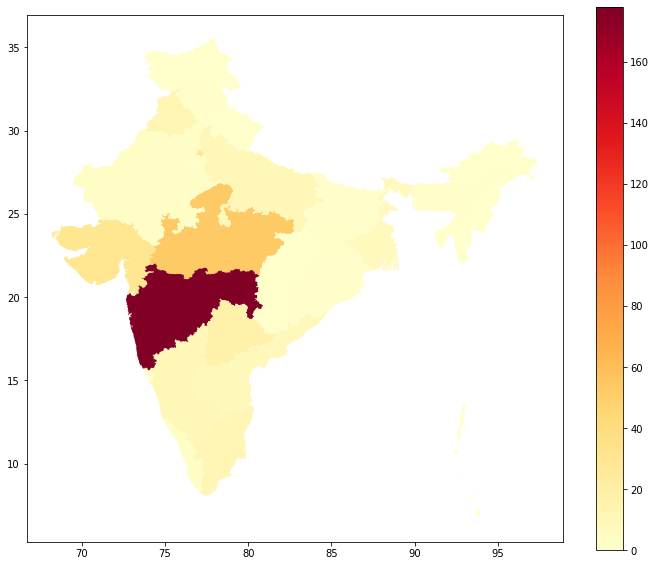

In [0]:
merged_map_data.plot(column='Deaths',categorical=False,figsize=(12,10),cmap='YlOrRd',legend=True)

# PLOT-1:
## a. NUMBER OF CASES IN INDIA (DAILY AND CUMULATIVE)

Text(0.5, 1.0, 'Daily')

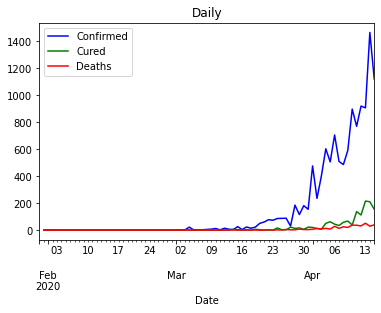

In [0]:
gb.diff().plot(y=['Confirmed','Cured','Deaths'],color=['b','g','r'])
plt.title('Daily')

Text(0.5, 1.0, 'Cummulative')

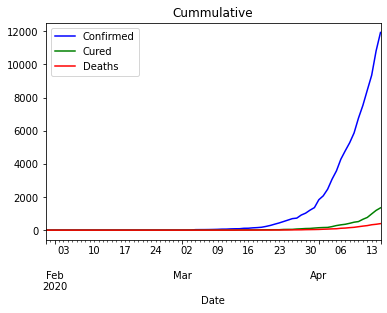

In [0]:
gb.plot(y=['Confirmed','Cured','Deaths'],color=['b','g','r'])
plt.title('Cummulative')

#PLOT-1
## b. NUMBER OF DEATHS VS CURED (DAILY AND CUMULATIVE)

Text(0.5, 1.0, 'Daily')

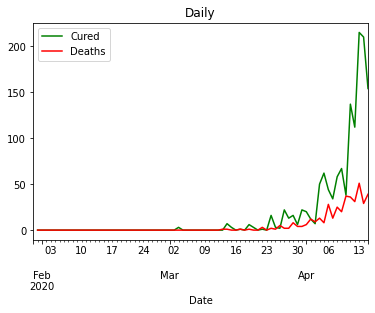

In [0]:
gb.diff().plot(y=['Cured','Deaths'],color = ['g', 'r'])
plt.title('Daily')

Text(0.5, 1.0, 'Cummulative')

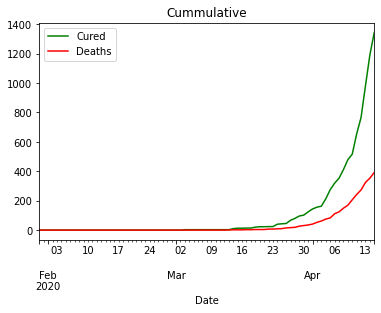

In [0]:
gb.plot(y=['Cured','Deaths'],color=['g','r'])
plt.title('Cummulative')

# Plot-1
## c.PERCENTAGE OF CURED VS DEATH

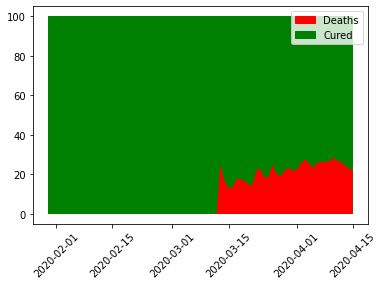

In [0]:
import matplotlib.patches as mpatches

plt.fill_between(gb.index,100,0,facecolor='green')
plt.fill_between(gb.index,gb['Deaths']*100/(gb['Cured']+gb['Deaths']),0,facecolor='red')
plt.xticks(rotation=45)
red_patch = mpatches.Patch(color='red', label='Deaths')
green_patch = mpatches.Patch(color='green', label='Cured')
plt.legend(handles=[red_patch,green_patch])